<a href="https://colab.research.google.com/github/agmonika75/agmonika/blob/main/breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import all needed libraries and sublibraries
 
import tensorflow as tf
 
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
import keras
 
import numpy as np
 
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras import regularizers
 
import pandas as pd
 
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
 
import matplotlib
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:

df1 = pd.read_csv('/content/drive/My Drive/Classification-Model-YT-Video-master/Classification-Model-YT-Video-master/X_data.csv')

df2 = pd.read_csv('/content/drive/My Drive/Classification-Model-YT-Video-master/Classification-Model-YT-Video-master/Y_data.csv')

In [ ]:
# Scale input data

df1 = preprocessing.scale(df1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df1, df2, test_size=0.2)

Epoch 00084: early stopping
114/114 [==============================] - 0s 33us/step
Test loss:  0.02797247201465724
Test accuracy:  0.9912280440330505


<Figure size 432x288 with 0 Axes>

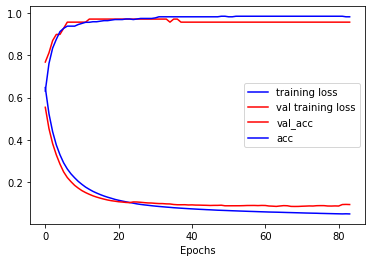

In [ ]:
# Define a "shallow" logistic regression model

model = Sequential()
model.add(Dense(13,input_shape=(30,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy'])


Y_pred = model.predict(X_test)
# Pass several parameters to 'EarlyStopping' function and assign it to 'earlystopper'

earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

# Fit model over 2000 iterations with 'earlystopper' callback, and assign it to history

history = model.fit(X_train, y_train, epochs = 2000, validation_split = 0.15, verbose = 0, 
                    callbacks = [earlystopper])

history_dict=history.history

# Plot training loss and validation split loss over the epochs

loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure()
plt.figure()
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")


# Plot accuracy over the epochs

accuracy_values = history_dict['accuracy']
val_accuracy_values=history_dict['val_accuracy']
plt.plot(val_accuracy_values,'-r',label='val_acc')
plt.plot(accuracy_values,'-b',label='acc')
plt.legend()

# Calculate loss and accuracy of testing data
loss, acc = model.evaluate(X_test, y_test)
print("Test loss: ", loss)
print("Test accuracy: ", acc)

In [ ]:
 
# Make y_train categorical and assign this to y_train_cat
y_train_cat = to_categorical(y_train)
 
 
#Define a "shallow" softmax regression model
 
model = Sequential()
model.add(Dense(13,input_shape=(30,), activation='softmax'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics = ['accuracy'])
 
# Pass several parameters to 'EarlyStopping' function and assign it to 'earlystopper'
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')
 
# Fit model over 2000 iterations with 'earlystopper' callback, and assign it to history
history = model.fit(X_train, y_train_cat, epochs = 2000, validation_split = 0.15, verbose = 0, 
                    callbacks = [earlystopper])
 
history_dict=history.history
  # print(history_dict.keys())

Epoch 01195: early stopping


Text(0.5, 0, 'Epochs')

<Figure size 432x288 with 0 Axes>

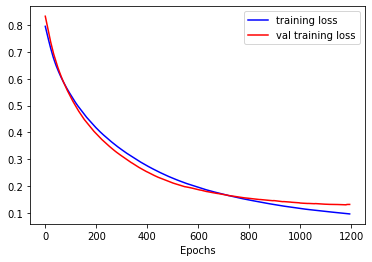

In [ ]:
# Plot training loss and validation split loss over the epochs

loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure()
plt.figure()
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

114/114 [==============================] - 0s 37us/step
Test loss:  0.07065905820120845
Test accuracy:  0.9912280440330505
Testing data AUC:  1.0


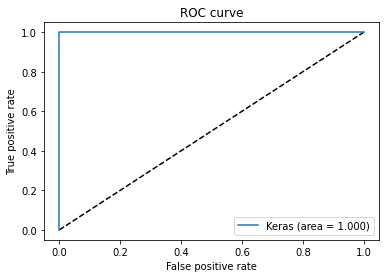

Testing data AUC:  0.9946516363935572


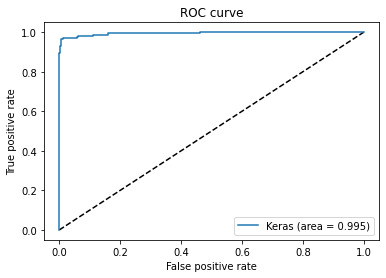

Epoch 00136: early stopping


<Figure size 432x288 with 0 Axes>

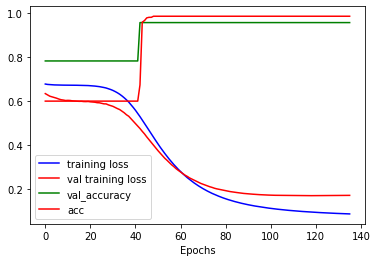

In [ ]:
y_test_cat = to_categorical(y_test)
loss, acc = model.evaluate(X_test, y_test_cat)
print("Test loss: ", loss)
print("Test accuracy: ", acc)

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_test_pred = model.predict_proba(X_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_test_pred[:,1])
auc_keras = auc(fpr_keras, tpr_keras)
print('Testing data AUC: ', auc_keras)

# ROC curve of testing data

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


#AUC score of training data

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_train_pred = model.predict_proba(X_train)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_train, y_train_pred[:,1])
auc_keras = auc(fpr_keras, tpr_keras)
print('Testing data AUC: ', auc_keras)


# ROC curve of training data

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


# Define a "deep" softmax regression model
model = Sequential()
model.add(Dense(13,input_shape=(30,), activation='softmax'))
model.add(Dense(13, activation='softmax'))
model.add(Dense(13, activation='softmax'))
model.add(Dense(13, activation='softmax'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy'])

# Pass several parameters to 'EarlyStopping' function and assign it to 'earlystopper'
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto')

# Fit model over 2000 iterations with 'earlystopper' callback, and assign it to history
history = model.fit(X_train, y_train_cat, epochs = 3000, validation_split = 0.1,shuffle = True, verbose = 0, 
                    callbacks = [earlystopper])
history_dict = history.history



loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure()
plt.figure()
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

# Plot accuracy over the epochs
accuracy_values = history_dict['accuracy']
val_accuracy_values=history_dict['val_accuracy']
plt.plot(val_accuracy_values,'-g',label='val_accuracy')
plt.plot(accuracy_values,'-r',label='acc')
plt.legend()

114/114 [==============================] - 0s 48us/step
Test loss:  0.06809441477321741
Test accuracy:  0.9912280440330505
Testing data AUC:  0.9996537396121883


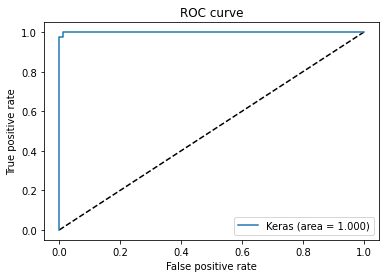

Testing data AUC:  0.9933659720650855


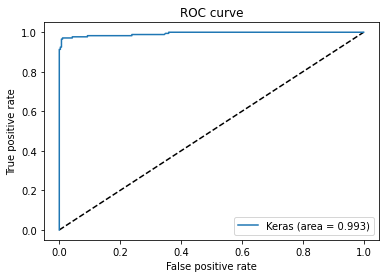

In [ ]:
# Calculate loss and accuracy of testing data
y_test_cat = to_categorical(y_test)
loss, acc = model.evaluate(X_test, y_test_cat)
print("Test loss: ", loss)
print("Test accuracy: ", acc)

# AUC score of testing data

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_test_pred = model.predict_proba(X_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_test_pred[:,1])
auc_keras = auc(fpr_keras, tpr_keras)
print('Testing data AUC: ', auc_keras)

# ROC curve of testing data

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# AUC score of training data

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_train_pred = model.predict_proba(X_train)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_train, y_train_pred[:,1])
auc_keras = auc(fpr_keras, tpr_keras)
print('Testing data AUC: ', auc_keras)

# ROC curve of training data
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

Done size:  45
Done size:  181
Done size:  317
Done size:  453


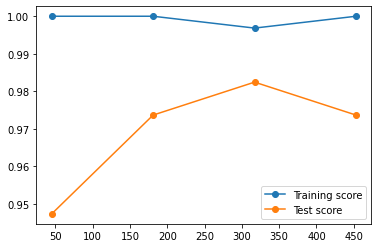

In [ ]:
model = Sequential()
model.add(Dense(13,input_shape=(30,), activation='softmax'))
model.add(Dense(13, activation='softmax'))
model.add(Dense(13, activation='softmax'))
model.add(Dense(13, activation='softmax'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy'])
# store the initial random weights
initial_weights = model.get_weights()
X_train, X_test, y_train, y_test = train_test_split(df1, df2, test_size=0.2)
train_sizes = (len(X_train) * np.linspace(0.1, 0.999, 4)).astype(int)
train_sizes

train_scores = []
test_scores = []

for train_size in train_sizes:
    X_train_frac, _, y_train_frac, _ = \
    train_test_split(X_train, y_train, train_size=train_size)
    # Make y_train_frac categorical and assign this to y_train_frac FIX THIS
    y_train_frac = to_categorical(y_train_frac)
    
    # Reset the weights of the model
    model.set_weights(initial_weights)
    
    h = model.fit(X_train_frac, y_train_frac,
                  verbose=0,
                  epochs=1000,
                  callbacks=[EarlyStopping(monitor='loss', patience=20)])

    r = model.evaluate(X_train_frac, y_train_frac, verbose=0)
    train_scores.append(r[-1])
    
    y_test_cat = to_categorical(y_test)
    
    e = model.evaluate(X_test, y_test_cat, verbose=0)
    test_scores.append(e[-1])
    
    print("Done size: ", train_size)
  


plt.plot(train_sizes, train_scores, 'o-', label="Training score")
plt.plot(train_sizes, test_scores, 'o-', label="Test score")
plt.legend(loc="best")

Epoch 00050: early stopping
114/114 [==============================] - 0s 47us/step
Test loss:  0.6460156357079222
Test accuracy:  0.6666666865348816


<Figure size 432x288 with 0 Axes>

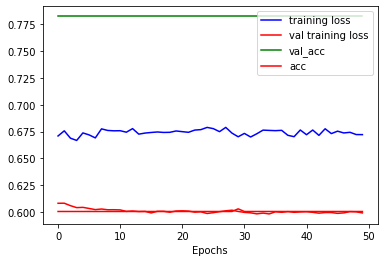

In [ ]:
# Define a "deep" softmax regression model
model =Sequential()
model.add(Dense(13,input_shape=(30,), activation='softmax'))
model.add(Dropout(0.3))
model.add(Dense(13, activation='softmax'))
model.add(Dropout(0.3))
model.add(Dense(13, activation='softmax'))
model.add(Dropout(0.3))
model.add(Dense(13, activation='softmax'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy'])

# Pass several parameters to 'EarlyStopping' function and assigns it to 'earlystopper'
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

# Fits model over 2000 iterations with 'earlystopper' callback, and assigns it to history
history = model.fit(X_train, y_train_cat, epochs = 3000, validation_split = 0.1,shuffle = True, verbose = 0, 
                    callbacks = [earlystopper])
history_dict = history.history

# Plot training loss and validation split loss over the epochs

loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure()
plt.figure()
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

# Plot accuracy over the epochs

accuracy_values = history_dict['accuracy']
val_accuracy_values=history_dict['val_accuracy']
plt.plot(val_accuracy_values,'-g',label='val_acc')
plt.plot(accuracy_values,'-r',label='acc')
plt.legend()

# Calculate loss and accuracy of testing data
y_test_cat = to_categorical(y_test)
loss, acc = model.evaluate(X_test, y_test_cat)
print("Test loss: ", loss)
print("Test accuracy: ", acc)